## Arima 분석

ARIMA : Autoregressvie integrated MovingAverage<br>
과거의 데이터를 사용하는 것을 넘어 과거의 데이터가 지니고 있던 추세까지 반영함

<br>
AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황<br>
MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

 

차분 : 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
data['day'] = pd.to_datetime(data['day'], format='%Y-%m-%d')
data.set_index('day', inplace = True)

# 훈련, 테스트 데이터 구분
train_len = int(len(data)*0.8)
train = data[:train_len]
test = data.drop(train.index)

<br>

### [Plot] 시계열 데이터 확인하기

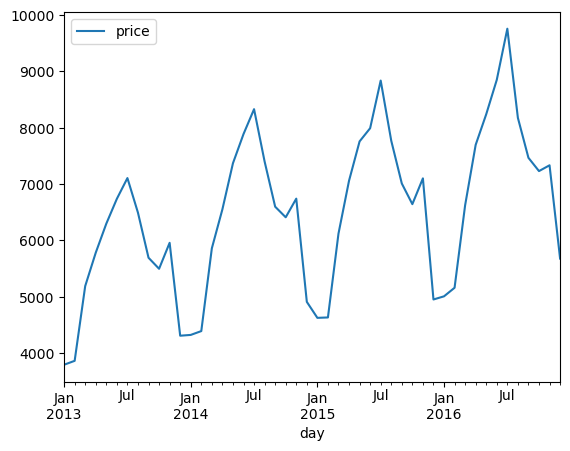

In [8]:
train.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller 

adf = adfuller(data, regression = 'ct')
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')

ADF Statistic: -1.6180598959846377
p-value: 0.7852805486100636


<AxesSubplot:xlabel='day'>

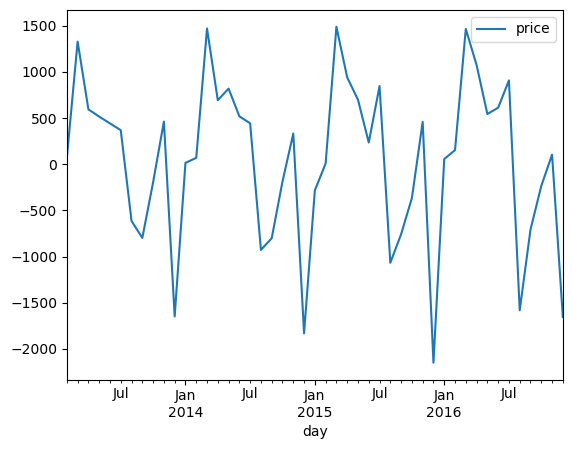

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = train.diff(1)
diff_data = diff_data.dropna()

diff_data.plot()